In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings
df = pd.read_csv('../datasets/Healthcare-Diabetes.csv')


X = df.iloc[:,1:9]
y = df[['Outcome']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)#train the classifier
#get model prediction on train and test set.
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
#print(y_pred_train)
#print(y_pred_test)


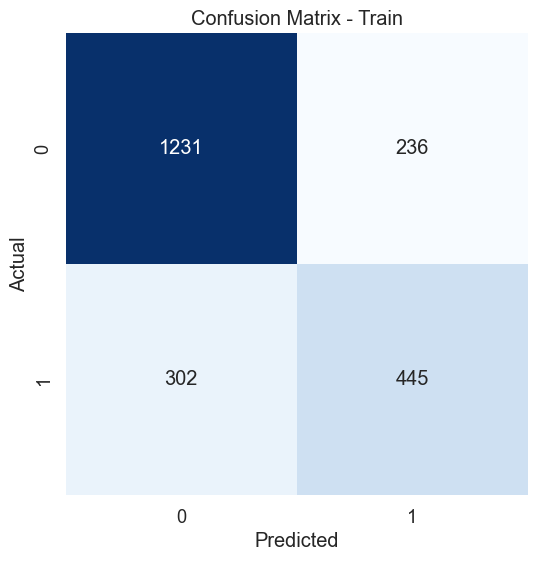

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)

#Create a heatmap - test set

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train')
plt.show()


In [8]:
from sklearn.metrics import classification_report
import numpy as np

train_report = classification_report(y_train, y_pred_train, target_names=['has diabetes','no diabetes'])
print("Classification Report:\n", train_report)

Classification Report:
               precision    recall  f1-score   support

has diabetes       0.80      0.84      0.82      1467
 no diabetes       0.65      0.60      0.62       747

    accuracy                           0.76      2214
   macro avg       0.73      0.72      0.72      2214
weighted avg       0.75      0.76      0.75      2214



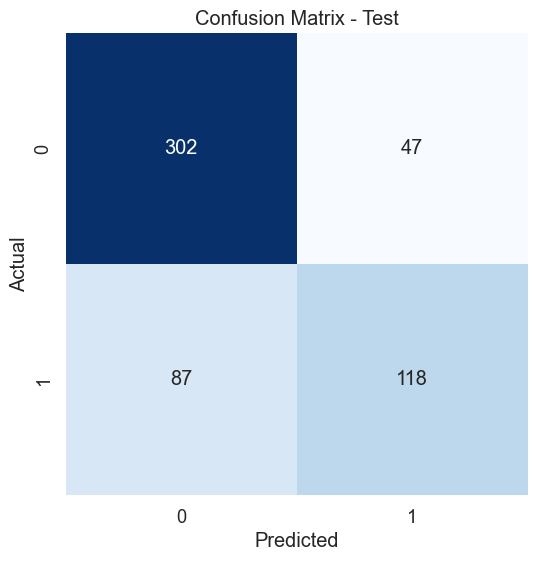

In [9]:
# Create confusion matrix test set
cm_test = confusion_matrix(y_test, y_pred_test)
# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

In [10]:
#tn, fp, fn, tp = cm_test
class_acc = (cm_test[0][0]+cm_test[1][1])/(cm_test[0][0]+cm_test[0][1]+cm_test[1][0]+cm_test[1][1])
test_report = classification_report(y_test, y_pred_test, target_names=['has diabetes','no diabetes'])
print("Classification Report:\n", test_report)

Classification Report:
               precision    recall  f1-score   support

has diabetes       0.78      0.87      0.82       349
 no diabetes       0.72      0.58      0.64       205

    accuracy                           0.76       554
   macro avg       0.75      0.72      0.73       554
weighted avg       0.75      0.76      0.75       554

